**Import Python libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB

**Import SMS Data**

In [2]:
df = pd.read_csv('../input/spamraw.csv')
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


**Exploratory Data Analysis (EDA)**

In [3]:
#Find count and unique messages count of all the messages
df.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [4]:
#Extract SPAM messages
spam_messages = df[df["type"]=="spam"]
spam_messages.head() 

,type,text
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
8,spam,Marvel Mobile Play the official Ultimate Spide...
19,spam,U can WIN £100 of Music Gift Vouchers every we...
34,spam,U have won a nokia 6230 plus a free digital ca...


In [5]:
#Find count and unique messages count of SPAM messages.
spam_messages.describe()

,type,text
count,747,747
unique,1,653
top,spam,Please call our customer service representativ...
freq,747,4


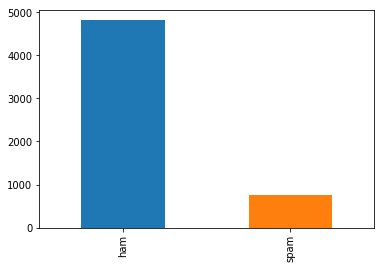

In [6]:
#Plot the counts of HAM (non SPAM) vs SPAM
df.type.value_counts().plot.bar()

**Splitting the SMS data into Test and Train data**

In [7]:
data_train, data_test, labels_train, labels_test = train_test_split(df.text,df.type,test_size=0.2,random_state=0) 

**Extraction & CountVectorize**


*The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.*

In [8]:
vectorizer = CountVectorizer()
data_train_count = vectorizer.fit_transform(data_train)
data_test_count  = vectorizer.transform(data_test)

**Modelling & training**

Multinomial Naive Bayes is a specialized version of Naive Bayes that is designed more for text documents. Whereas simple naive Bayes would model a document as the presence and absence of particular words, multinomial naive bayes explicitly models the word counts and adjusts the underlying calculations to deal with in.

It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [9]:
clf = MultinomialNB()
clf.fit(data_train_count, labels_train)
predictions = clf.predict(data_test_count)

In [10]:
print ("accuracy_score : ", accuracy_score(labels_test, predictions))

accuracy_score :  0.9901079136690647


**Confusion Matrix**


*A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.*

In [11]:
print ("confusion_matrix : \n", confusion_matrix(labels_test, predictions))

confusion_matrix : 
 [[979   0]
 [ 11 122]]
